In [39]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Dropout

In [2]:
'''
Dataset of google stock prices from 2016 to 2017 (until first month). The first month of 2017 is treated as test set.
Each month has 20 working days.
'''

dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [13]:
'''
Off all the series present , the neural net will be trained upon the open prices of the stock.
'''
# In order to create a numpy array, slicing is done in the following way.
training_data = dataset.iloc[:,1:2].values
print(training_data.shape)
training_data

(1258, 1)


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
# The stock prices are normalized.
scaler = MinMaxScaler()
training_data_scaled = scaler.fit_transform(training_data)

print(training_data_scaled.shape)
training_data_scaled

(1258, 1)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [19]:
# In order to train the neural net, we'll use 60 time steps as input to the net.The neural net will try to memorize and
# understand the pattern of growth against time and the output will be the next price.Thus , the training data X_train
# will contain 60 stock prices in incremental order and corresponding output for 60 time steps ,y_train will be the price 
# on 61st day.

X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_data_scaled[i-60:i,0])
    y_train.append(training_data_scaled[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape,y_train.shape)

# The recurrent layers in keras expect the input tensor to be 3-D of type [batch,time_stpes,input_dim(=1 since we're using only open prices)]
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

(1198, 60) (1198,)


In [25]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam',metrics=['accuracy'],loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0560 - acc: 0.0017- ETA: 7s - loss: 0
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0069 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0058 - acc: 0.0017- ETA: 3s - loss: 0.0050 - - ETA: 1s - loss: 0.
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0055 - acc: 0.0017- ETA: 3s - loss: 0.0052 - ETA: 1s - loss: 0.0058
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047 - acc: 0.0017- ETA: 1s - loss: 0.004
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049 - acc: 0.0017- ETA: 3s - loss: 0. - ETA: 1s - loss: 0.0048 - a
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045 - acc: 0.0017
Epoch 9/100
1198/1198 [======

1198/1198 [==============================] - 6s 5ms/step - loss: 0.0017 - acc: 0.0017
Epoch 81/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0015 - acc: 0.0017
Epoch 82/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017 - acc: 0.0017
Epoch 83/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0019 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0018 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0017 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015 - acc: 0.0017
Epoch 88/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017 - acc: 0.0017
Epoch 89/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0015 - acc: 0.0017- ETA: 2s - loss: 0.0016

In [29]:
model.save('stock_pred.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
__________

In [30]:
# In order to test our model's prediction with the test set ground truth values, we need to concatenate the dataframes of 
# train and test set because the predicitons of 1st month of 2017 depend upon the previous 60 time steps out of which some
# will be in test set and some in training set.

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
true_price = dataset_test.iloc[:,1:2].values
dataset_final = pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs = dataset_final[len(dataset_final) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1,1) # to get the correct dimensions for the numpy array
inputs = scaler.transform(inputs)

In [31]:
# creating similar structure for test set as done for training set of 60 time steps.

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [34]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[794.18335],
       [791.0479 ],
       [791.03766],
       [792.8686 ],
       [796.7281 ],
       [803.0787 ],
       [809.0638 ],
       [811.5981 ],
       [811.6527 ],
       [811.0384 ],
       [810.7594 ],
       [810.751  ],
       [810.7861 ],
       [811.3138 ],
       [812.19226],
       [816.6341 ],
       [823.9815 ],
       [832.1415 ],
       [836.8218 ],
       [832.69434]], dtype=float32)

In [35]:
true_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

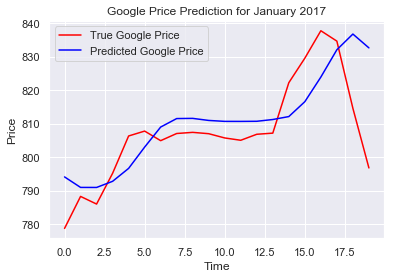

In [42]:
plt.plot(true_price,color='red',label='True Google Price')
plt.plot(predictions,color='blue',label='Predicted Google Price')
plt.title('Google Price Prediction for January 2017')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
 # Although the model coudn't predict the exact  values it did get some trend of the stock's movement.